In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.applications import EfficientNetB0    # 위의 사이트에 쓰여 있는 모델이름 import

import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

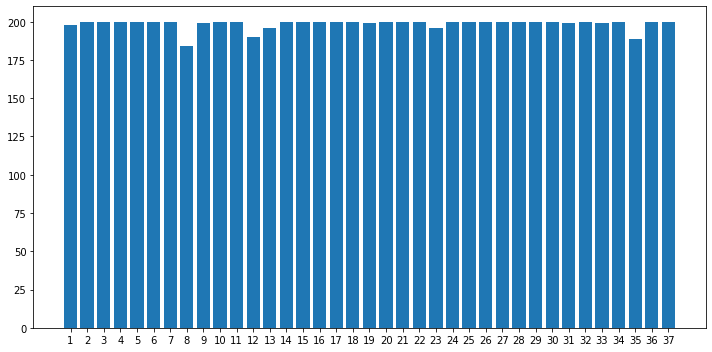

In [2]:
csv_path = 'D:/data_ai/5_AI/kfolds.csv'
df = pd.read_csv(csv_path)
np.unique(df['id'])    # 중복안되게 종류나열

value_counts = df['id'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(range(len(value_counts)), value_counts.values)
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

# id 개수 : 37
# 각 id에 해당하는 이미지 개수 : y축

In [4]:
# 다중 분류로 모델 변경하기
# 케라스 어플리케이션 예제

def get_model(input_shape):
    inputs = keras.Input(input_shape)  # input layer 생성
    base_model = EfficientNetB0(
        input_shape = input_shape,
        weights = 'imagenet',
        include_top = False,
        pooling = 'avg'    # pooling 기억안나면 5_모델구현 다시 보기
    )
    
    x = base_model(inputs)
    output = layers.Dense(37, activation='softmax')(x)    # 다중 분류에서 0~1 사이의 실수로 리턴. 총 합이 1이 됨. 확률로 해석 가능
    model = keras.Model(inputs, output)
    return model

input_shape=(256, 256, 3)
model = get_model(input_shape)

adam = keras.optimizers.Adam(lr=0.0001)

model.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',    # 다중 분류 문제이기 때문에
    metrics='accuracy'
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense (Dense)               (None, 37)                47397     
                                                                 
Total params: 4,096,968
Trainable params: 4,054,945
Non-trainable params: 42,023
_________________________________________________________________


c:\program files\python37\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
